In [0]:
%matplotlib inline
from fastai.basics import *

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
path = '/content/drive/My Drive/mnist.pkl.gz'

In [0]:
with gzip.open(path, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

(50000, 784)

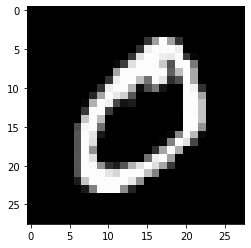

In [7]:
plt.imshow(x_train[1].reshape((28,28)), cmap="gray")
x_train.shape

In [8]:
x_train,y_train,x_valid,y_valid = map(torch.tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train.shape, y_train.min(), y_train.max()

(torch.Size([50000, 784]), tensor(0), tensor(9))

In [0]:
bs=64
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)
data = DataBunch.create(train_ds, valid_ds, bs=bs)

In [12]:
x,y = next(iter(data.train_dl))
x.shape,y.shape

(torch.Size([64, 784]), torch.Size([64]))

In [0]:
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10, bias=True)

    def forward(self, xb): return self.lin(xb)

In [0]:
model = Mnist_Logistic().cuda()

In [15]:
model

Mnist_Logistic(
  (lin): Linear(in_features=784, out_features=10, bias=True)
)

In [16]:
model.lin

Linear(in_features=784, out_features=10, bias=True)

In [21]:
model(x).shape

torch.Size([64, 10])

In [22]:
[p.shape for p in model.parameters()]

[torch.Size([10, 784]), torch.Size([10])]

In [23]:
[p for p in model.parameters()]

[Parameter containing:
 tensor([[-0.0224,  0.0233, -0.0335,  ..., -0.0170,  0.0299,  0.0211],
         [-0.0217,  0.0193,  0.0330,  ...,  0.0268, -0.0142, -0.0356],
         [-0.0147,  0.0313,  0.0260,  ...,  0.0307, -0.0114,  0.0069],
         ...,
         [-0.0031,  0.0231,  0.0201,  ..., -0.0124, -0.0177,  0.0201],
         [ 0.0292,  0.0031,  0.0321,  ..., -0.0219,  0.0002, -0.0167],
         [-0.0156, -0.0226,  0.0337,  ..., -0.0225, -0.0301, -0.0275]],
        device='cuda:0', requires_grad=True), Parameter containing:
 tensor([-0.0040,  0.0310,  0.0130, -0.0303, -0.0130, -0.0085, -0.0290, -0.0061,
          0.0203,  0.0268], device='cuda:0', requires_grad=True)]

In [0]:
lr=2e-2

In [0]:
loss_func = nn.CrossEntropyLoss()

In [0]:
def update(x,y,lr):
    wd = 1e-5
    y_hat = model(x)
    w2 = 0.
    for p in model.parameters(): w2 += (p**2).sum()
    loss = loss_func(y_hat, y) + w2*wd
    loss.backward()
    with torch.no_grad():
        for p in model.parameters():
            p.sub_(lr * p.grad)
            p.grad.zero_()
    return loss.item()

In [0]:
losses = [update(x,y,lr) for x,y in data.train_dl]

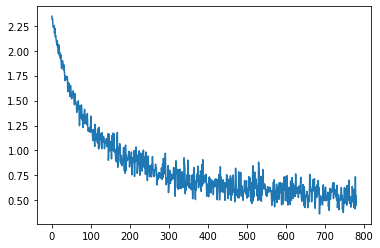

In [28]:
plt.plot(losses)

In [0]:
class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(784, 50, bias=True)
        self.lin2 = nn.Linear(50, 10, bias=True)

    def forward(self, xb):
        x = self.lin1(xb)
        x = F.relu(x)
        return self.lin2(x)

In [0]:
model = Mnist_NN().cuda()

In [0]:
losses = [update(x,y,lr) for x,y in data.train_dl]

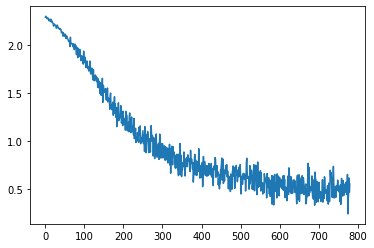

In [32]:
plt.plot(losses)

In [0]:
model = Mnist_NN().cuda()

In [0]:
def update(x,y,lr):
    opt = optim.SGD(model.parameters(), lr)
    y_hat = model(x)
    loss = loss_func(y_hat, y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    return loss.item()

In [0]:
losses = [update(x,y,lr) for x,y in data.train_dl]

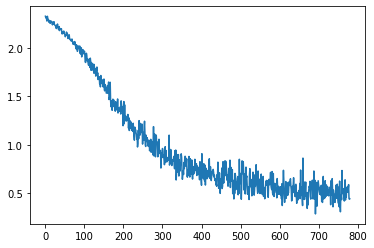

In [36]:
plt.plot(losses)

In [0]:
def update(x,y,lr):
    opt = optim.Adam(model.parameters(), lr)
    y_hat = model(x)
    loss = loss_func(y_hat, y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    return loss.item()

In [0]:
losses = [update(x,y,lr) for x,y in data.train_dl]

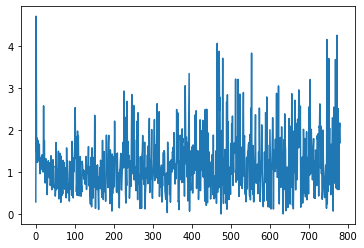

In [39]:
plt.plot(losses)

In [0]:
model = Mnist_NN().cuda()

In [0]:
def update(x,y,lr):
    opt = optim.Adam(model.parameters(), lr)
    y_hat = model(x)
    loss = loss_func(y_hat, y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    return loss.item()

In [0]:
losses = [update(x,y,1e-3) for x,y in data.train_dl]

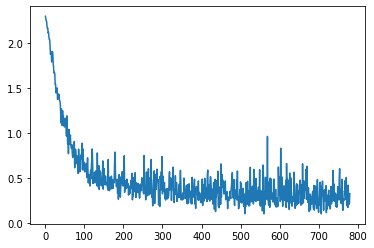

In [45]:
plt.plot(losses)

In [0]:
model = Mnist_NN().cuda()

In [0]:
def update(x,y,lr):
    opt = optim.SGD(model.parameters(), lr, momentum=0.9)
    y_hat = model(x)
    loss = loss_func(y_hat, y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    return loss.item()

In [0]:
losses = [update(x,y,1e-2) for x,y in data.train_dl]

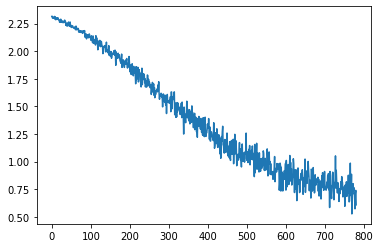

In [73]:
plt.plot(losses)

In [0]:
model = Mnist_NN().cuda()

In [0]:
def update(x,y,lr):
    opt = optim.RMSprop(model.parameters(), lr)
    y_hat = model(x)
    loss = loss_func(y_hat, y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    return loss.item()

In [0]:
losses = [update(x,y,1e-4) for x,y in data.train_dl]

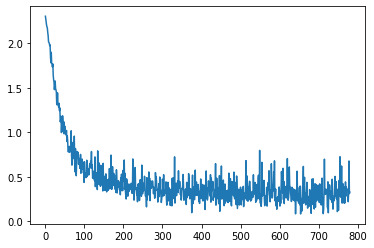

In [69]:
plt.plot(losses)

In [0]:
learn = Learner(data, Mnist_NN(), loss_func=loss_func, metrics=error_rate)

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


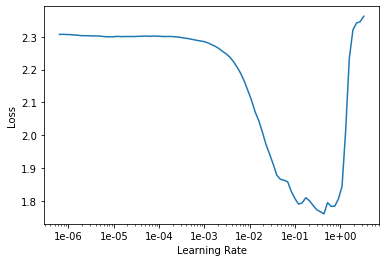

In [78]:
learn.lr_find()
learn.recorder.plot()

In [79]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.152018,0.127762,0.037700,00:03


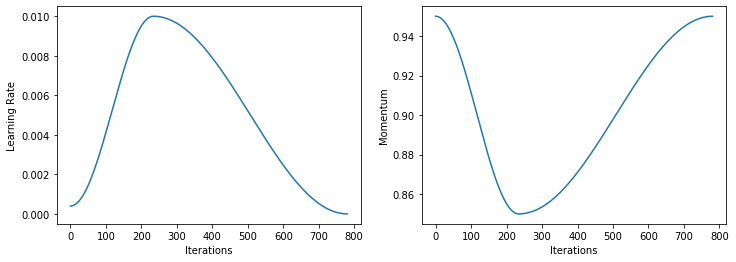

In [80]:
learn.recorder.plot_lr(show_moms=True)

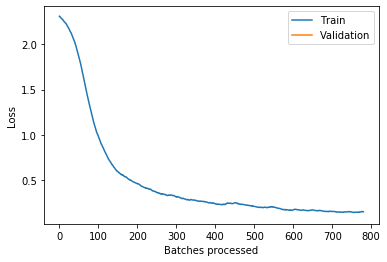

In [81]:
learn.recorder.plot_losses()